In [1]:
# importing the necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tqdm import tqdm
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import resize
import scipy.ndimage
import IPython
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import optimizers
import sklearn.model_selection
import tensorflow.keras.backend as K
%matplotlib inline

In [2]:
# sccor rv dataset
base_dir1 = '/home/kiara/Desktop/CMR_Metric_Calculator/Dataset_Segmentation/'
train_img_dir1 = os.path.join(base_dir1, 'PNG_images/')
train_label_dir1 = os.path.join(base_dir1, 'PNG_labels/')
train_img_fname1 = os.listdir(train_img_dir1)
train_label_fname1 = train_img_fname1

# miccai dataset
base_dir = '/home/kiara/Desktop/LV_CMRI/MICCAI_RV/'
train_img_dir = os.path.join(base_dir, 'RV_Images/')
train_label_dir = os.path.join(base_dir, 'RV_Label/')

In [3]:
# obtaining the training image (and corresponding label (masks)) file names as a list
train_img_fname = os.listdir(train_img_dir)

f = lambda x: x.replace(".dcm", ".png")

train_label_fname = list(map(f, train_img_fname))

In [4]:
print(train_img_fname1[:10])
print("\n")
print(train_label_fname1[:10])
print("\n")
print(train_img_fname[:10])
print("\n")
print(train_label_fname[:10])

['05P1VOL558_BAS_cine_ShortAxis_g03_s03_t13_i01.png', '05P1VOL518_BAS_cine_ShortAxis_g03_s09_t04_i01.png', '05P1VOL529_BAS_cine_ShortAxis_g03_s07_t16_i01.png', '05P1VOL511_BAS_cine_ShortAxis_g03_s09_t19_i01.png', '05P1VOL528_BAS_cine_ShortAxis_g03_s08_t03_i01.png', '05P1VOL538_BAS_cine_ShortAxis_g02_s05_t04_i01.png', '05P1VOL527_BAS_cine_ShortAxis_g03_s13_t20_i01.png', '05P1VOL504_BAS_cine_ShortAxis_g03_s07_t16_i01.png', '05P1VOL544_BAS_cine_ShortAxis_g03_s06_t13_i01.png', '05P1VOL542_BAS_cine_ShortAxis_g03_s14_t15_i01.png']


['05P1VOL558_BAS_cine_ShortAxis_g03_s03_t13_i01.png', '05P1VOL518_BAS_cine_ShortAxis_g03_s09_t04_i01.png', '05P1VOL529_BAS_cine_ShortAxis_g03_s07_t16_i01.png', '05P1VOL511_BAS_cine_ShortAxis_g03_s09_t19_i01.png', '05P1VOL528_BAS_cine_ShortAxis_g03_s08_t03_i01.png', '05P1VOL538_BAS_cine_ShortAxis_g02_s05_t04_i01.png', '05P1VOL527_BAS_cine_ShortAxis_g03_s13_t20_i01.png', '05P1VOL504_BAS_cine_ShortAxis_g03_s07_t16_i01.png', '05P1VOL544_BAS_cine_ShortAxis_g03_s06_t13

In [5]:
# shuffling the image list randomply and saving it
train_img_fnames = random.sample(train_img_fname, len(train_img_fname))
train_label_fnames = train_img_fnames
print(len(train_label_fnames))

243


In [6]:
training_dataset, test_dataset = sklearn.model_selection.train_test_split(train_img_fnames, test_size=0.1)
train_img_fnames = training_dataset
train_label_fnames = list(map(f, train_img_fnames))

In [7]:
test_img_fnames = test_dataset
test_label_fnames = list(map(f, test_img_fnames))

In [8]:
training_images = train_img_fname1 + train_img_fnames
training_labels = train_label_fname1 + train_label_fnames
print(train_img_fname1[:5])
print(train_label_fname1[:5])
print("\n")
print(train_img_fnames[:5])
print(train_label_fnames[:5])
print(len(training_images))
print(len(test_img_fnames))

['05P1VOL558_BAS_cine_ShortAxis_g03_s03_t13_i01.png', '05P1VOL518_BAS_cine_ShortAxis_g03_s09_t04_i01.png', '05P1VOL529_BAS_cine_ShortAxis_g03_s07_t16_i01.png', '05P1VOL511_BAS_cine_ShortAxis_g03_s09_t19_i01.png', '05P1VOL528_BAS_cine_ShortAxis_g03_s08_t03_i01.png']
['05P1VOL558_BAS_cine_ShortAxis_g03_s03_t13_i01.png', '05P1VOL518_BAS_cine_ShortAxis_g03_s09_t04_i01.png', '05P1VOL529_BAS_cine_ShortAxis_g03_s07_t16_i01.png', '05P1VOL511_BAS_cine_ShortAxis_g03_s09_t19_i01.png', '05P1VOL528_BAS_cine_ShortAxis_g03_s08_t03_i01.png']


['P09-0167.dcm', 'P06-0148.dcm', 'P10-0087.dcm', 'P09-0087.dcm', 'P13-0180.dcm']
['P09-0167.png', 'P06-0148.png', 'P10-0087.png', 'P09-0087.png', 'P13-0180.png']
11297
25


In [9]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNEL = 1
IMG_CHANNELS = 3

In [10]:
# creating an array of the same dimension as the input images
X_train = np.zeros((2*len(training_images), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), dtype = np.float32)
Y_train = np.zeros((2*len(training_labels), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype = np.float32)

In [11]:
#print("Resizing train images")
from numpy import asarray
from PIL import Image
for n, id_ in tqdm(enumerate(training_images), total=len(training_images)):
    n=n*2
    
    if id_ in train_img_fnames:
        img = imread(train_img_dir + id_) # read the image
        pixels=asarray(img).astype('float32')
        pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels = pixels.astype('float32')
        # normalize to the range 0-1
        pixels /= 255.0
        # confirm the normalization
        X_train[n] = pixels.astype('float32')
    
         # rotate only
        img = imread(train_img_dir + id_) # read the image
        r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        pixels1=asarray(r_img).astype('float32')
        pixels1 = resize(pixels1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels1 = pixels1.astype('float32')
        # normalize to the range 0-1
        pixels1 /= 255.0
        # confirm the normalization
        X_train[n+1] = pixels1.astype('float32')
        
    elif id_ in train_img_fname1:
        img = imread(train_img_dir1 + id_) # read the image
        pixels=asarray(img).astype('float32')
        pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels = pixels.astype('float32')
        # normalize to the range 0-1
        pixels /= 255.0
        # confirm the normalization
        X_train[n] = pixels.astype('float32')
    
         # rotate only
        img = imread(train_img_dir1 + id_) # read the image
        r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        pixels1=asarray(r_img).astype('float32')
        pixels1 = resize(pixels1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels1 = pixels1.astype('float32')
        # normalize to the range 0-1
        pixels1 /= 255.0
        # confirm the normalization
        X_train[n+1] = pixels1.astype('float32')
        
    else:
        print(id_)
        print("Cant find the file in any of the two datasets")

100%|██████████| 11297/11297 [01:01<00:00, 184.43it/s]


In [12]:
'''#print("Resizing train images")
from numpy import asarray
from PIL import Image
for n, id_ in tqdm(enumerate(train_img_fnames), total=len(train_img_fnames)):
    n=n*2
    img = imread(train_img_dir + id_) # read the image
    pixels=asarray(img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels = pixels.astype('float32')
    # normalize to the range 0-1
    pixels /= 255.0
    # confirm the normalization
    X_train[n] = pixels.astype('float32')
    
     # rotate only
    img = imread(train_img_dir + id_) # read the image
    r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    pixels1=asarray(r_img).astype('float32')
    pixels1 = resize(pixels1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels1 = pixels1.astype('float32')
    # normalize to the range 0-1
    pixels1 /= 255.0
    # confirm the normalization
    X_train[n+1] = pixels1.astype('float32')'''
    '''
    img = imread(train_img_dir + id_) # read the image
    r_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    pixels1=asarray(r_img).astype('float32')
    pixels1 = resize(pixels1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels1 = pixels1.astype('float32')
    # normalize to the range 0-1
    pixels1 /= 255.0
    # confirm the normalization
    X_train[n+2] = pixels1.astype('float32')
    
    # rotate and CLAHE
    img = cv2.imread((train_img_dir + id_), IMG_CHANNEL) # read the image
    # rotate the image
    r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    #Converting image to LAB Color so CLAHE can be applied to the luminance channel
    lab_img= cv2.cvtColor(r_img, cv2.COLOR_BGR2LAB)
    #Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)
    #Apply histogram equalization to the L channel
    equ = cv2.equalizeHist(l)
    #Combine the Hist. equalized L-channel back with A and B channels
    updated_lab_img1 = cv2.merge((equ,a,b))
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))
    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    pixels=asarray(CLAHE_img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels = pixels.astype('float32')
    # normalize to the range 0-1
    pixels /= 255.0
    X_train[n+3] = pixels.astype('float32')'''
    
    
    
    
    '''# Remove comments to perform Augmentation
    #print("-----------------------CLAHE and ROTATE------------------")
    img = cv2.imread((train_img_dir + id_), IMG_CHANNEL) # read the image
    # rotate the image
    r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    #Converting image to LAB Color so CLAHE can be applied to the luminance channel
    lab_img= cv2.cvtColor(r_img, cv2.COLOR_BGR2LAB)
    #Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)
    #Apply histogram equalization to the L channel
    equ = cv2.equalizeHist(l)
    #Combine the Hist. equalized L-channel back with A and B channels
    updated_lab_img1 = cv2.merge((equ,a,b))
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))
    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    pixels=asarray(CLAHE_img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels = pixels.astype('float32')
    # normalize to the range 0-1
    pixels /= 255.0
    X_train[n+3] = pixels.astype('float32')'''

    '''
    #print("-----------------------CLAHE ONLY ------------------")
    img = cv2.imread((train_img_dir + id_), IMG_CHANNEL) # read the image
    # rotate the image
    r_img = img
    #Converting image to LAB Color so CLAHE can be applied to the luminance channel
    lab_img= cv2.cvtColor(r_img, cv2.COLOR_BGR2LAB)
    #Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)
    #Apply histogram equalization to the L channel
    equ = cv2.equalizeHist(l)
    #Combine the Hist. equalized L-channel back with A and B channels
    updated_lab_img1 = cv2.merge((equ,a,b))
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))
    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    pixels=asarray(CLAHE_img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels = pixels.astype('float32')
    # normalize to the range 0-1
    pixels /= 255.0
    X_train[n+2] = pixels.astype('float32')
    '''
    '''#print("-----------------------CLAHE AND ROTATE COUNTER ONLY------------------")
    img = cv2.imread((train_img_dir + id_), 1) # read the image
    # rotate the image
    r_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    #Converting image to LAB Color so CLAHE can be applied to the luminance channel
    lab_img= cv2.cvtColor(r_img, cv2.COLOR_BGR2LAB)
    #Splitting the LAB image to L, A and B channels, respectively
    l, a, b = cv2.split(lab_img)
    #Apply histogram equalization to the L channel
    equ = cv2.equalizeHist(l)
    #Combine the Hist. equalized L-channel back with A and B channels
    updated_lab_img1 = cv2.merge((equ,a,b))
    #Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    clahe_img = clahe.apply(l)
    #Combine the CLAHE enhanced L-channel back with A and B channels
    updated_lab_img2 = cv2.merge((clahe_img,a,b))
    #Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    pixels=asarray(CLAHE_img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    # convert from integers to floats
    pixels = pixels.astype('float32')
    # normalize to the range 0-1
    pixels /= 255.0
    X_train[n+2] = pixels.astype('float32')'''

IndentationError: unexpected indent (<ipython-input-12-cc8ad51da669>, line 27)

In [ ]:
train_label_fnames

In [13]:
#print("Resizing train images")
from numpy import asarray
from PIL import Image
for n, id_ in tqdm(enumerate(training_labels), total=len(training_labels)):
    n=n*2
    
    if id_ in train_label_fnames:
        img = imread(train_label_dir + id_) # read the image
        pixels=asarray(img).astype('float32')
        pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels = pixels.astype('float32')
        # normalize to the range 0-1
        pixels /= 255.0
        Y_train[n] = pixels.astype('float32')
    
         #clahe and rotate
        img = imread(train_label_dir + id_) # read the image
        r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        pixels1=asarray(r_img).astype('float32')
        pixels1 = resize(pixels1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels1 = pixels1.astype('float32')
        # normalize to the range 0-1
        pixels1 /= 255.0
        # confirm the normalization
        Y_train[n+1] = pixels1.astype('float32')
    
    elif id_ in train_label_fname1:
        img = imread(train_label_dir1 + id_) # read the image
        pixels=asarray(img).astype('float32')
        pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels = pixels.astype('float32')
        # normalize to the range 0-1
        pixels /= 255.0
        Y_train[n] = pixels.astype('float32')
    
         #clahe and rotate
        img = imread(train_label_dir1 + id_) # read the image
        r_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
        pixels1=asarray(r_img).astype('float32')
        pixels1 = resize(pixels1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode = 'constant', preserve_range = True)
        # convert from integers to floats
        pixels1 = pixels1.astype('float32')
        # normalize to the range 0-1
        pixels1 /= 255.0
        # confirm the normalization
        Y_train[n+1] = pixels1.astype('float32')
        
    else:
        print(id_)
        print("Cant find the file in any of the two datasets")

100%|██████████| 11297/11297 [07:15<00:00, 25.94it/s]


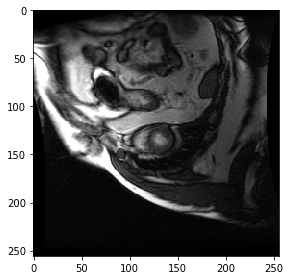

In [14]:
# plotting an image
seed = 17
np.random.seed = seed
image_x = random.randint(0, len(train_img_fnames)) # generate a random number between 0 and length of training ids
imshow(np.squeeze(X_train[image_x]))
#plt.savefig("image.pdf", format='pdf')
plt.show()

/home/kiara/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


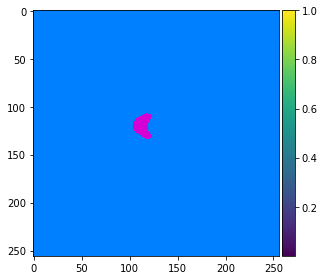

In [15]:
imshow(np.squeeze(Y_train[image_x]))
#plt.savefig("label.pdf", format='pdf')
plt.show()

In [16]:
X_test = np.zeros((len(test_img_fnames), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), dtype = np.float32)
sizes_test = []
print("Resizing test images")
for n, id_ in tqdm(enumerate(test_img_fnames), total=len(test_img_fnames)):
    path = base_dir
    img = imread(train_img_dir + id_) # read the image
    # Uncomment to test on HELIX Dataset
    #img = imread('/media/kiara/My Passport/HELIX/image/' + id_)
    pixels=asarray(img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL), mode = 'constant', preserve_range = True)
    
    # convert from integers to floats
    pixels = pixels.astype('float32')
    
    # normalize to the range 0-1
    pixels /= 255.0
    X_test[n] = pixels.astype('float32')

100%|██████████| 25/25 [00:00<00:00, 430.93it/s]

Resizing test images


In [17]:
Y_test = np.zeros((len(test_label_fnames), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype = np.float32)
print("Resizing test images")
from numpy import asarray
from PIL import Image
for n, id_ in tqdm(enumerate(test_label_fnames), total=len(test_label_fnames)):
    #path = base_dir
    img = imread(train_label_dir + id_) # read the image
    #img = imread('/media/kiara/My Passport/HELIX/label/ShortAxis/' + id_)
    pixels=asarray(img).astype('float32')
    pixels = resize(pixels, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode = 'constant', preserve_range = True)
    
    # convert from integers to floats
    pixels = pixels.astype('float32')
    
    # normalize to the range 0-1
    pixels /= 255.0
    Y_test[n] = pixels.astype('float32')

 24%|██▍       | 6/25 [00:00<00:00, 52.11it/s]

Resizing test images


100%|██████████| 25/25 [00:00<00:00, 52.37it/s]


/home/kiara/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


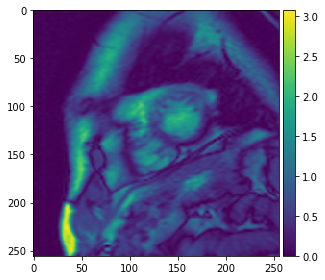

In [18]:
seed = 17
np.random.seed = seed
image_x = random.randint(0, len(test_img_fnames)) # generate a random number between 0 and length of training ids
imshow(np.squeeze(X_test[image_x]))
#plt.savefig("image.pdf", format='pdf')
plt.show()

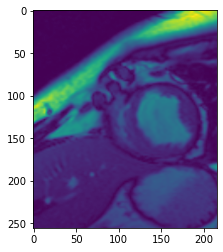

In [19]:
import pydicom as dicom
ds = dicom.dcmread(train_img_dir + train_img_fnames[1])

plt.imshow(ds.pixel_array)

#filename = 
#img = Image.open(filename)
#img.show()

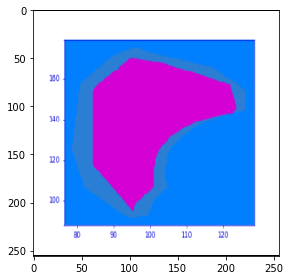

In [20]:
imshow(np.squeeze(Y_test[image_x]))
#plt.savefig("label.pdf", format='pdf')
plt.show()

In [21]:
def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def precision(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [22]:
def DC(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-DC(y_true, y_pred)

In [23]:
# importing packages necessary for model training
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tqdm import tqdm
import pandas as pd
from skimage.io import imread, imshow
from skimage.transform import resize
import scipy.ndimage
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import IPython
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from numpy import asarray
from PIL import Image
import sklearn.model_selection

In [24]:
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNEL = 1
IMG_CHANNELS = 3

In [25]:
# defining input layer
inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNEL))
# pixels to floating point numbers
s = tf.keras.layers.Lambda(lambda x: (x/255))(inputs)
print(s)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), name='lambda/truediv:0', description="created by layer 'lambda'")


In [26]:

c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.5)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.5)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.5)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.5)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.5)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.Dropout(0.5)(c5)

# Expansion Path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.5)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.5)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.5)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.5)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(3, (1,1), activation='sigmoid')(c9)

In [27]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
opt = keras.optimizers.Adam(learning_rate=0.1)
#model.compile(optimizer=opt, loss=dice_coef_loss, metrics=[DC, iou_coef, 'acc', precision, recall])
model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=[DC, iou_coef, 'acc', precision, recall])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 256, 256, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
# model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/home/kiara/Desktop/UNET_WITH_2000RERUN.h5', verbose = 2, save_weights_only = True)
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience = 50, monitor = 'val_loss'),
    tf.keras.callbacks.TensorBoard(log_dir = 'Log_UNET_WITH_2000RERUN')
]
# change name to 2000RERUNAug

# FIT MODEL
results = model.fit(X_train, Y_train, validation_split = 0.1, batch_size = 4, epochs = 150, callbacks=callbacks)

#model.save('model_UNET_WITH_2000RERUN')
#model.save('model_UNET_WITH_2000RERUN.h5')

Epoch 1/150


In [ ]:
model.evaluate(X_test, Y_test, verbose=1)